In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import os

In [2]:
torch.manual_seed(1)
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
def train_network(network, inputs, targets, criterion, optimizer, max_iterations=2000, tolerance=1.0e-05, loss_threshold=0.001):
    iteration_counts = []
    loss_values = []
    gradient_norms = []
    
    iteration = 0
    converged = False
    
    while not converged:
        iteration += 1
        # Forward pass
        outputs = network(inputs)
        loss = criterion(outputs, targets)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Record metrics
        iteration_counts.append(iteration)
        loss_values.append(loss.item())
        
        total_gradient = 0.0
        for param in network.parameters():
            if param.grad is not None:
                total_gradient += (param.grad.cpu().data.numpy() ** 2).sum()
        gradient_magnitude = total_gradient ** 0.5
        gradient_norms.append(gradient_magnitude)
        
        # Print progress
        if iteration % 100 == 0:
            print(f'Iteration: {iteration}, Loss = {loss.item():.4f}')
        
        # Check for convergence
        if iteration >= max_iterations:
            print("Maximum iterations reached")
            converged = True
        elif iteration > 5 and loss_values[-1] < loss_threshold:
            if abs(loss_values[-3] - loss_values[-2]) < tolerance and abs(loss_values[-2] - loss_values[-1]) < tolerance:
                print("Convergence achieved with loss:", loss_values[-1])
                converged = True
    
    return iteration_counts, loss_values, outputs, gradient_norms

In [4]:
start_range, end_range, step_size = -1.5, 1.5, 0.01
input_data = np.arange(start_range, end_range, step_size)
reshaped_inputs = np.expand_dims(input_data, axis=1)
print(f'Shape of reshaped inputs: {reshaped_inputs.shape}')
frequency = 5
target_data = np.sinc(frequency * reshaped_inputs)
print(f'Shape of target data: {target_data.shape}')


Shape of reshaped inputs: (300, 1)
Shape of target data: (300, 1)


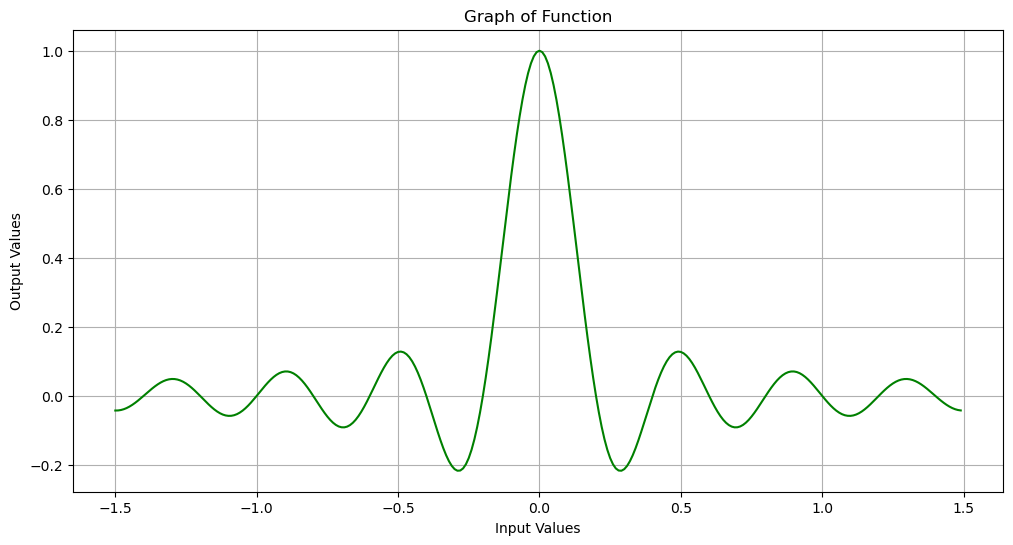

In [5]:
input_tensor = torch.tensor(reshaped_inputs, dtype=torch.float32)
output_tensor = torch.tensor(target_data, dtype=torch.float32)

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(input_tensor.numpy(), output_tensor.numpy(), color="green")
plt.title('Graph of Function')
plt.xlabel('Input Values')
plt.ylabel('Output Values')
plt.grid(True)
plt.show()

In [6]:
class CustomModel(nn.Module):
    def __init__(self):
        super(CustomModel, self).__init__()
        # Define the layers of the network
        self.layers = nn.Sequential(
            nn.Linear(1, 5),                # Input layer to hidden layer 1
            nn.ReLU(),                      # ReLU activation function
            nn.Linear(5, 10),               # Hidden layer 1 to hidden layer 2
            nn.ReLU(),                      # ReLU activation function
            nn.Linear(10, 10),              # Hidden layer 2 to hidden layer 3
            nn.ReLU(),                      # ReLU activation function
            nn.Linear(10, 10),              # Hidden layer 3 to hidden layer 4
            nn.ReLU(),                      # ReLU activation function
            nn.Linear(10, 10),              # Hidden layer 4 to hidden layer 5
            nn.ReLU(),                      # ReLU activation function
            nn.Linear(10, 10),              # Hidden layer 5 to hidden layer 6
            nn.ReLU(),                      # ReLU activation function
            nn.Linear(10, 5),               # Hidden layer 6 to hidden layer 7
            nn.ReLU(),                      # ReLU activation function
            nn.Linear(5, 1)                 # Hidden layer 7 to output layer
        )
    
    def forward(self, x):
        return self.layers(x)

# Instantiate the new model
model_1 = CustomModel()


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
model_1 = CustomModel()
learning_rate = 1e-4
weight_decay = 1e-4
optimizer = optim.Adam(params=model_1.parameters(), lr=learning_rate, weight_decay=weight_decay)
loss_function = nn.MSELoss()
total_params = sum(p.numel() for p in model_1.parameters() if p.requires_grad)
print(f'Total number of parameters: {total_params}')
def model_train_v2(model, inputs, targets, num_epochs=2000, loss_threshold=0.001, grad_tolerance=1.0e-5):
    epoch_history = []
    loss_history = []
    gradient_history = []

    epoch_count = 0
    convergence_reached = False

    while not convergence_reached:
        epoch_count += 1
        predictions = model(inputs)
        loss = loss_function(predictions, targets)

        # Backward pass
        optimizer.zero_grad()  
        loss.backward()       
        optimizer.step()      # Update model parameters

        # Track metrics
        epoch_history.append(epoch_count)
        loss_history.append(loss.item())

        # Calculate gradient norm
        total_grad_norm = sum((param.grad ** 2).sum().item() for param in model.parameters() if param.grad is not None)
        gradient_norm = total_grad_norm ** 0.5
        gradient_history.append(gradient_norm)

        # Print progress
        if epoch_count % 100 == 0:
            print(f'Epoch: {epoch_count}, Loss: {loss.item():.4f}')

        # Check for convergence
        if epoch_count >= num_epochs:
            print("Maximum epochs reached")
            convergence_reached = True
        elif len(loss_history) > 2 and (
            abs(loss_history[-1] - loss_history[-2]) < grad_tolerance and
            abs(loss_history[-2] - loss_history[-3]) < grad_tolerance
        ):
            print("Convergence reached")
            convergence_reached = True

    return epoch_history, loss_history, predictions, gradient_history

# Prepare input and target data
x = torch.tensor(np.expand_dims(np.arange(-1.5, 1.5, 0.01), 1), dtype=torch.float32)
y = torch.tensor(np.sinc(5 * np.expand_dims(np.arange(-1.5, 1.5, 0.01), 1)), dtype=torch.float32)

# Train the model
m1_epoch_arr, m1_loss_arr, m1_prediction, m1_grad_arr = model_train_v2(model_1, x, y)


Total number of parameters: 571
Epoch: 100, Loss: 0.0964
Epoch: 200, Loss: 0.0853
Epoch: 300, Loss: 0.0780
Epoch: 400, Loss: 0.0748
Epoch: 500, Loss: 0.0722
Epoch: 600, Loss: 0.0701
Epoch: 700, Loss: 0.0683
Epoch: 800, Loss: 0.0669
Epoch: 900, Loss: 0.0657
Convergence reached


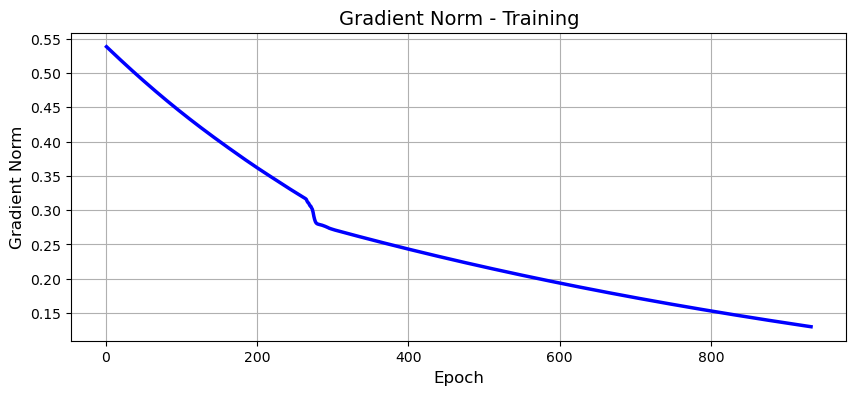

In [13]:
import seaborn as sns 
epochs_np = np.array(m1_epoch_arr)
gradients_np = np.array(m1_grad_arr)
plt.figure(figsize=(10, 4))
sns.lineplot(x=epochs_np, y=gradients_np, color='blue', linewidth=2.5)
plt.title('Gradient Norm - Training', fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Gradient Norm", fontsize=12)
plt.grid(True)  
plt.show()


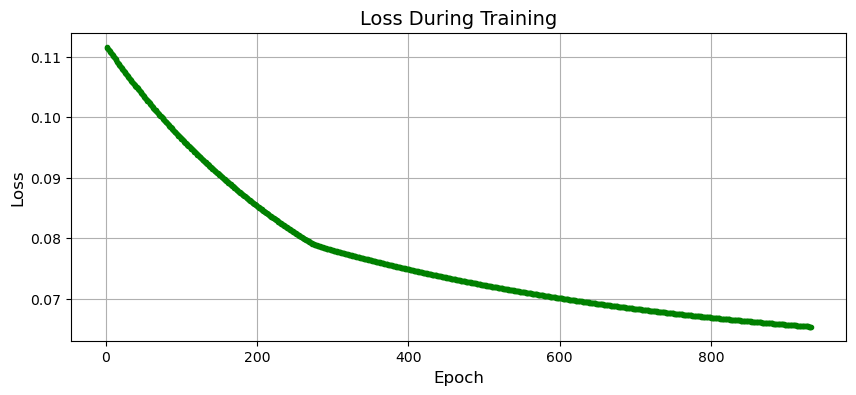

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Convert lists to numpy arrays for better handling
epochs_np = np.array(m1_epoch_arr)
losses_np = np.array(m1_loss_arr)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 4))

# Plot the data
ax.plot(epochs_np, losses_np, color='green', linestyle='-', marker='o', markersize=3, linewidth=1.5)

# Set plot title and labels
ax.set_title('Loss During Training', fontsize=14)
ax.set_xlabel("Epoch", fontsize=12)
ax.set_ylabel("Loss", fontsize=12)

# Add grid lines for better readability
ax.grid(True)

# Show plot
plt.show()


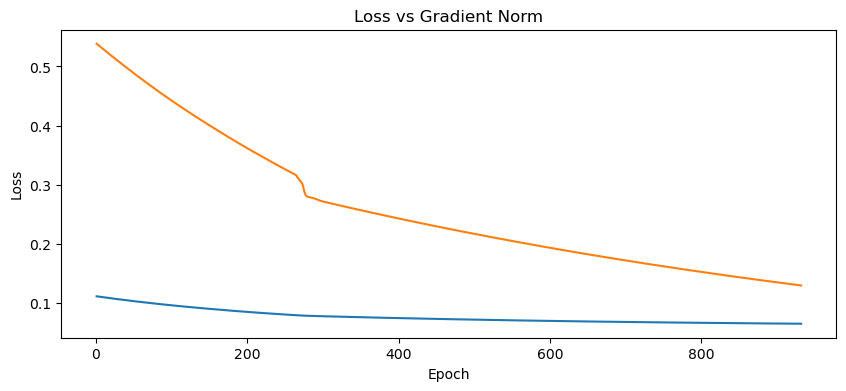

In [15]:
plt.figure(figsize=(10,4))
plt.plot(m1_epoch_arr, m1_loss_arr)
plt.plot(m1_epoch_arr, m1_grad_arr)
plt.title('Loss vs Gradient Norm')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()